<a href="https://colab.research.google.com/github/Sayantan615/Bike-Rental-Predictions/blob/main/Bike_Rental_Demand_using_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Inspection

In [ ]:
import pandas as pd

# Construct the full path to the file (adjust filename if yours is different)
file_path = '/content/drive/MyDrive/Bike Rental Project/Bike sharing.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [ ]:
# Statistical summary of numerical columns
print(df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].describe())

              temp         atemp      humidity     windspeed         count
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000
mean      20.23086     23.655084     61.886460     12.799395    191.574132
std        7.79159      8.474601     19.245033      8.164537    181.144454
min        0.82000      0.760000      0.000000      0.000000      1.000000
25%       13.94000     16.665000     47.000000      7.001500     42.000000
50%       20.50000     24.240000     62.000000     12.998000    145.000000
75%       26.24000     31.060000     77.000000     16.997900    284.000000
max       41.00000     45.455000    100.000000     56.996900    977.000000


In [ ]:
# Define a threshold: if a column has fewer than 25 unique values, treat as categorical
categorical_cols = []
numerical_cols = []

for col in df.columns:
    if df[col].nunique() < 25 and col != 'count': # 'count' is our target
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['season', 'holiday', 'workingday', 'weather']
Numerical Columns: ['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


## Feature Engineering

In [ ]:
# Convert to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract features (which are categorical)
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek

In [ ]:
import numpy as np
df['temp_workingday'] = df['temp'] * df['workingday']
df['temp_holiday'] = df['temp'] * df['holiday']
df['hum_weather'] = df['humidity'] * df['weather']
df['temp_squared'] = df['temp'] ** 2
df['log_windspeed'] = np.log1p(df['windspeed'])

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day_of_week,temp_workingday,temp_holiday,hum_weather,temp_squared,log_windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,0.0,0.0,81,96.8256,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,0.0,0.0,80,81.3604,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5,0.0,0.0,80,81.3604,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5,0.0,0.0,75,96.8256,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5,0.0,0.0,75,96.8256,0.0


In [ ]:
# Create dummy variables for categorical features
# We use 'drop_first=True' to avoid the Dummy Variable Trap (Multicollinearity)
df_final = pd.get_dummies(df, columns=['season', 'hour', 'weather', 'month', 'day_of_week'], drop_first=True)

print(f"New shape of dataset: {df_final.shape}")
df_final.head()

New shape of dataset: (10886, 61)


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,month_9,month_10,month_11,month_12,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,False,False,False,False,False,False,False,False,True,False
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,False,False,False,False,False,False,False,False,True,False
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,False,False,False,False,False,False,False,False,True,False
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,False,False,False,False,False,False,False,False,True,False
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df['is_rush_hour'] = df['hour'].apply(lambda x: 1 if x in [8, 17, 18] else 0)

In [ ]:
if 'atemp' in df.columns:
  df_final.drop('atemp', axis=1, inplace=True)

if 'windspeed' in df.columns:
  df_final.drop('windspeed', axis=1, inplace=True)

# Drop columns that are parts of the target or no longer needed
if 'casual' in df_final.columns:
  df_final.drop(['casual', 'registered'], axis=1, inplace=True)

if 'datetime' in df_final.columns:
  df_final.drop(['datetime'], axis=1, inplace=True)

In [ ]:
# Remove duplicate columns by keeping only the first occurrence
df_final = df_final.loc[:, ~df_final.columns.duplicated()]
print(df_final.columns)
print(df_final.head(5))

Index(['holiday', 'workingday', 'temp', 'humidity', 'count', 'temp_workingday',
       'temp_holiday', 'hum_weather', 'temp_squared', 'log_windspeed',
       'season_2', 'season_3', 'season_4', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'weather_2', 'weather_3', 'weather_4', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6'],
      dtype='object')
   holiday  workingday  temp  humidity  count  temp_workingday  temp_holiday  \
0        0           0  9.84        81     16              0.0           0.0   
1        0           0  9.02        80     40              0.0   

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop('count', axis=1)
y = df_final['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X.head()
# y.head()

In [ ]:
import numpy as np

print(f"Any negative values in y? {np.any(y_train < 0)}")
print(f"Any non-integer values in y? {np.any(y_train % 1 != 0)}")
print(f"Any NaNs in y? {y_train.isnull().any()}")
print(f"Any Inf values in y? {np.isinf(y_train).any()}")

Any negative values in y? False
Any non-integer values in y? False
Any NaNs in y? False
Any Inf values in y? False


## Data Exploration

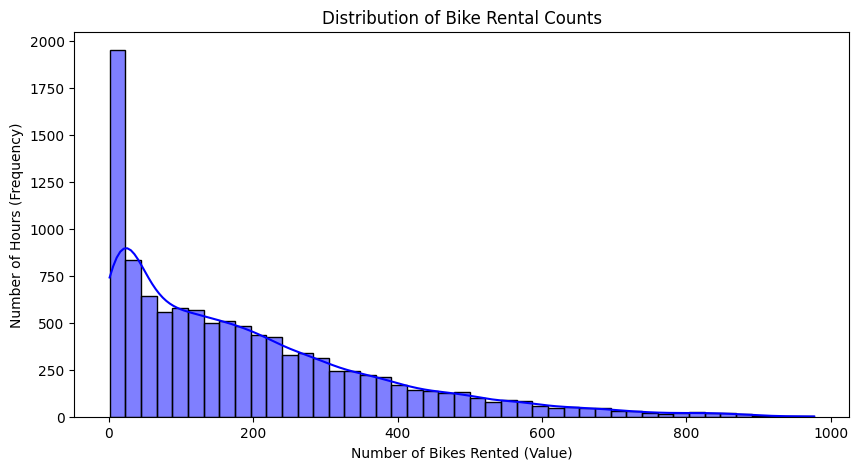

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Plotting the histogram
sns.histplot(df['count'], kde=True, color='blue')

# Adding clear labels for better interpretation
plt.title('Distribution of Bike Rental Counts')
plt.xlabel('Number of Bikes Rented (Value)')  # X-axis: The data values
plt.ylabel('Number of Hours (Frequency)')     # Y-axis: How many times it happened

plt.show()

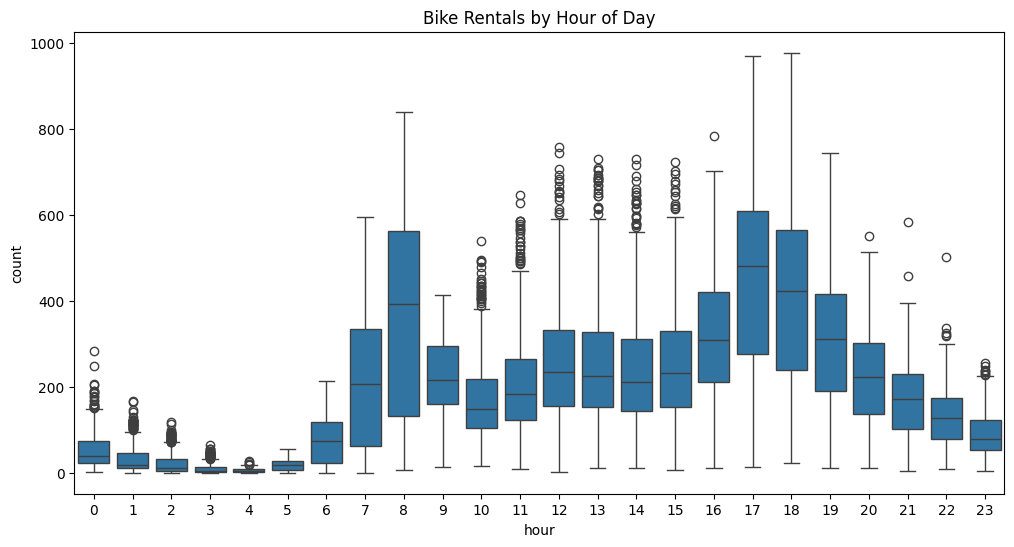

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='count', data=df)
plt.title('Bike Rentals by Hour of Day')
plt.show()

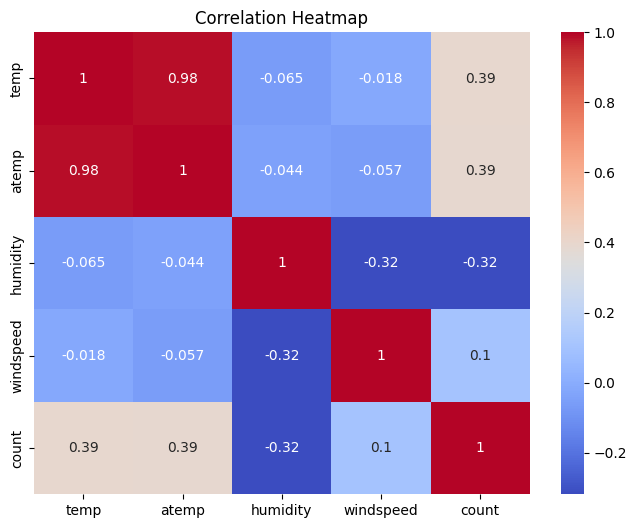

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

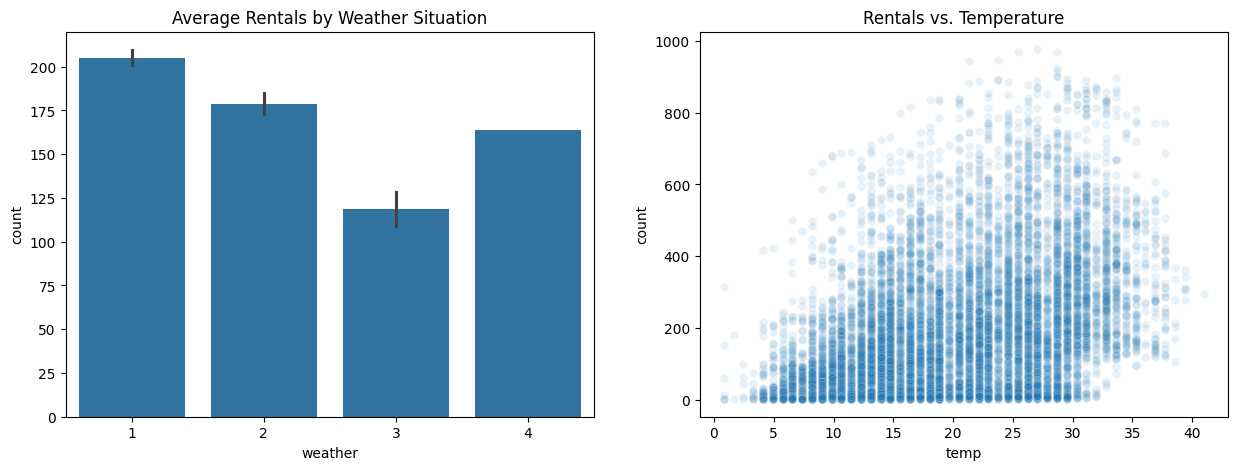

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Weather Categories
sns.barplot(x='weather', y='count', data=df, ax=axes[0])
axes[0].set_title('Average Rentals by Weather Situation')

# Temperature (Numerical)
sns.scatterplot(x='temp', y='count', data=df, alpha=0.1, ax=axes[1])
axes[1].set_title('Rentals vs. Temperature')

plt.show()

# Model Training

## Data Preperation

In [ ]:
import statsmodels.api as sm

# Add constant to both Train and Test sets
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
X_train_const.head()
X_test_const.head()

,const,holiday,workingday,temp,humidity,temp_workingday,temp_holiday,hum_weather,temp_squared,log_windspeed,...,month_9,month_10,month_11,month_12,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
3133,1.0,0,1,33.62,59,33.62,0.0,59,1130.3044,0.000000,...,False,False,False,False,True,False,False,False,False,False
5786,1.0,1,0,4.10,54,0.00,4.1,54,16.8100,1.946367,...,False,False,False,False,False,False,False,False,False,False
5224,1.0,0,0,9.84,48,0.00,0.0,48,96.8256,2.638914,...,False,False,False,True,False,False,False,False,False,True
8953,1.0,0,1,29.52,62,29.52,0.0,124,871.4304,2.638914,...,False,False,False,False,False,True,False,False,False,False
8054,1.0,0,1,25.42,53,25.42,0.0,53,646.1764,2.890255,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Check data types of all columns in your training set
print("--- X_train Data Types ---")
print(X_train_const.dtypes[X_train_const.dtypes == 'object'])

print("\n--- y_train Data Type ---")
print(y_train.dtype)

--- X_train Data Types ---
Series([], dtype: object)

--- y_train Data Type ---
int64


In [ ]:
# Convert to clean numpy arrays to avoid 'Object/Boolean' conflicts
# We use float so the math is precise
y_clean = np.asarray(y_train).astype(float)
X_clean = np.asarray(X_train_const).astype(float)
X_test_clean = np.asarray(X_test_const).astype(float)
y_test_clean = np.asarray(y_test).astype(float)

In [ ]:
# Check if these columns still exist in your training features
leaky_cols = ['casual', 'registered', 'datetime', 'count']
found = [c for c in leaky_cols if c in X_train.columns]
print(f"Leaky columns found: {found}")
print(X_train.columns)

Leaky columns found: []
Index(['holiday', 'workingday', 'temp', 'humidity', 'temp_workingday',
       'temp_holiday', 'hum_weather', 'temp_squared', 'log_windspeed',
       'season_2', 'season_3', 'season_4', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'weather_2', 'weather_3', 'weather_4', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6'],
      dtype='object')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
import numpy as np

def evaluate_model(y_true, y_pred, is_log_transformed=False):
    """
    Calculates MAE and RMSLE.
    If the model was trained on log(y+1), it transforms predictions back.
    """
    # 1. Undo log transformation if necessary
    if is_log_transformed:
        y_pred = np.expm1(y_pred)

    # 2. Handle constraints: Bike counts cannot be negative
    y_pred_clipped = np.maximum(y_pred, 0)
    y_true_clean = np.maximum(y_true, 0)

    # 3. Calculate MAE
    mae = mean_absolute_error(y_true_clean, y_pred_clipped)

    # 4. Calculate RMSLE
    # Note: MSLE handles the log(p+1) and log(a+1) internally
    msle = mean_squared_log_error(y_true_clean, y_pred_clipped)
    rmsle = np.sqrt(msle)

    return mae, rmsle

## Model: GLM Possioin

In [ ]:
# Fit the GLM Poisson Model
# We pass the column names back into the summary so we can read it!
poisson_model = sm.GLM(y_clean, X_clean, family=sm.families.Poisson()).fit()

# Print the results with names
feature_names = ['const'] + list(X_train.columns)
print(poisson_model.summary(xname=feature_names))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 8708
Model:                            GLM   Df Residuals:                     8656
Model Family:                 Poisson   Df Model:                           51
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0181e+05
Date:                Sat, 21 Feb 2026   Deviance:                   3.4788e+05
Time:                        11:40:19   Pearson chi2:                 3.55e+05
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0407      0.009    2

Mean Absolute Error: 68.92 bikes
RMSLE: 0.6647


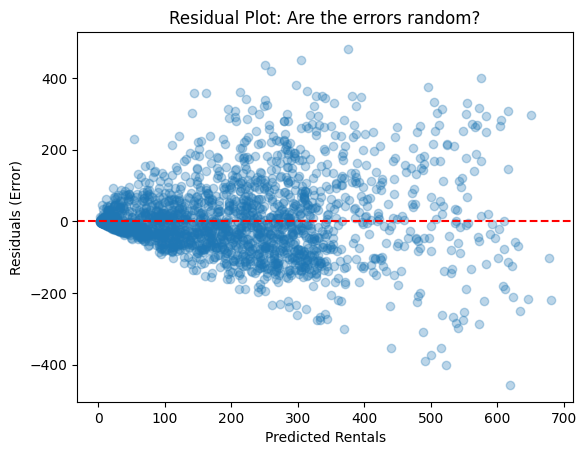

In [ ]:
# Calculate residuals
poisson_predictions = poisson_model.predict(sm.add_constant(X_test_clean))
poisson_residuals = y_test - poisson_predictions

mae_score, rmsle_score = evaluate_model(y_test, poisson_predictions, is_log_transformed=False)

print(f"Mean Absolute Error: {mae_score:.2f} bikes")
print(f"RMSLE: {rmsle_score:.4f}")

# Plot Residuals
import matplotlib.pyplot as plt
plt.scatter(poisson_predictions, poisson_residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Rentals')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot: Are the errors random?')
plt.show()

## Model: Neg. Binomial

In [ ]:
nb_model = sm.GLM(y_clean, X_clean,
                  family=sm.families.NegativeBinomial(alpha=1.0)).fit()

print(nb_model.summary(xname=feature_names))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 8708
Model:                            GLM   Df Residuals:                     8656
Model Family:        NegativeBinomial   Df Model:                           51
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50087.
Date:                Sat, 21 Feb 2026   Deviance:                       3073.9
Time:                        11:40:19   Pearson chi2:                 2.73e+03
No. Iterations:                    16   Pseudo R-squ. (CS):             0.6366
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.1317      0.092     

Mean Absolute Error: 72.10 bikes
RMSLE: 0.6683


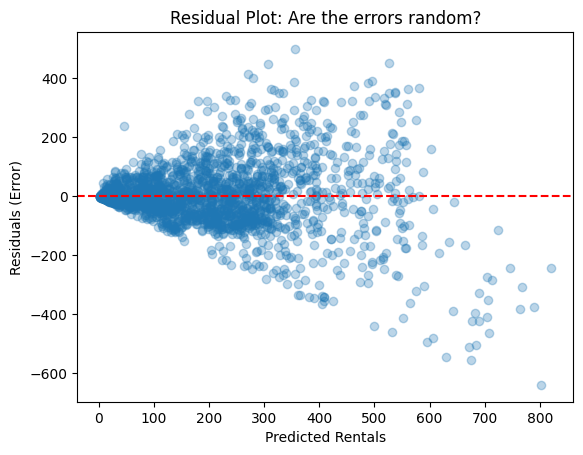

In [ ]:
# Calculate residuals
nb_predictions = nb_model.predict(sm.add_constant(X_test_clean))
nb_residuals = y_test - nb_predictions

mae_score, rmsle_score = evaluate_model(y_test, nb_predictions, is_log_transformed=False)

print(f"Mean Absolute Error: {mae_score:.2f} bikes")
print(f"RMSLE: {rmsle_score:.4f}")

# Plot Residuals
import matplotlib.pyplot as plt
plt.scatter(nb_predictions, nb_residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Rentals')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot: Are the errors random?')
plt.show()

## Model: Log-Gaussian

In [ ]:
import numpy as np
import statsmodels.api as sm

# 1. Log-transform the target variable
y_train_log = np.log1p(y_clean)

# 2. Fit the Gaussian GLM (Linear Regression in a GLM wrapper)
# We use the identity link because the 'log' is already in the target
log_gaussian_model = sm.GLM(y_train_log, X_clean, family=sm.families.Gaussian()).fit()

# 3. When predicting, remember to 'undo' the log to get real bike counts
log_predictions = log_gaussian_model.predict(X_test_clean)
final_predictions = np.expm1(log_predictions) # exp(x) - 1

print(log_gaussian_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 8708
Model:                            GLM   Df Residuals:                     8656
Model Family:                Gaussian   Df Model:                           51
Link Function:               Identity   Scale:                         0.38371
Method:                          IRLS   Log-Likelihood:                -8159.5
Date:                Sat, 21 Feb 2026   Deviance:                       3321.4
Time:                        11:40:20   Pearson chi2:                 3.32e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9854
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0091      0.056     35.989      0.0

Mean Absolute Error: 70.35 bikes
RMSLE: 0.6234


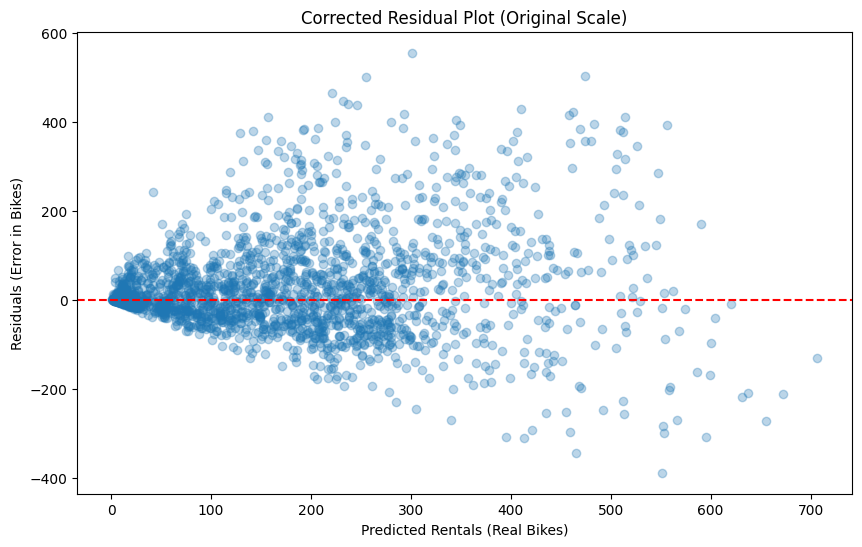

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Get predictions in Log Space
log_predictions = log_gaussian_model.predict(X_test_clean)

# 2. Transform predictions back to Real Bikes
log_predictions = np.expm1(log_predictions)

# 3. Calculate residuals on the SAME scale (Real Bikes)
# Ensure y_test is also a numpy array for consistent subtraction
residuals = np.asarray(y_test).flatten() - log_predictions

mae_score, rmsle_score = evaluate_model(y_test, log_predictions, is_log_transformed=False)

print(f"Mean Absolute Error: {mae_score:.2f} bikes")
print(f"RMSLE: {rmsle_score:.4f}")

# 4. Plot
plt.figure(figsize=(10, 6))
plt.scatter(final_predictions, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Rentals (Real Bikes)')
plt.ylabel('Residuals (Error in Bikes)')
plt.title('Corrected Residual Plot (Original Scale)')
plt.show()

## Decision Tree (Single Tree)

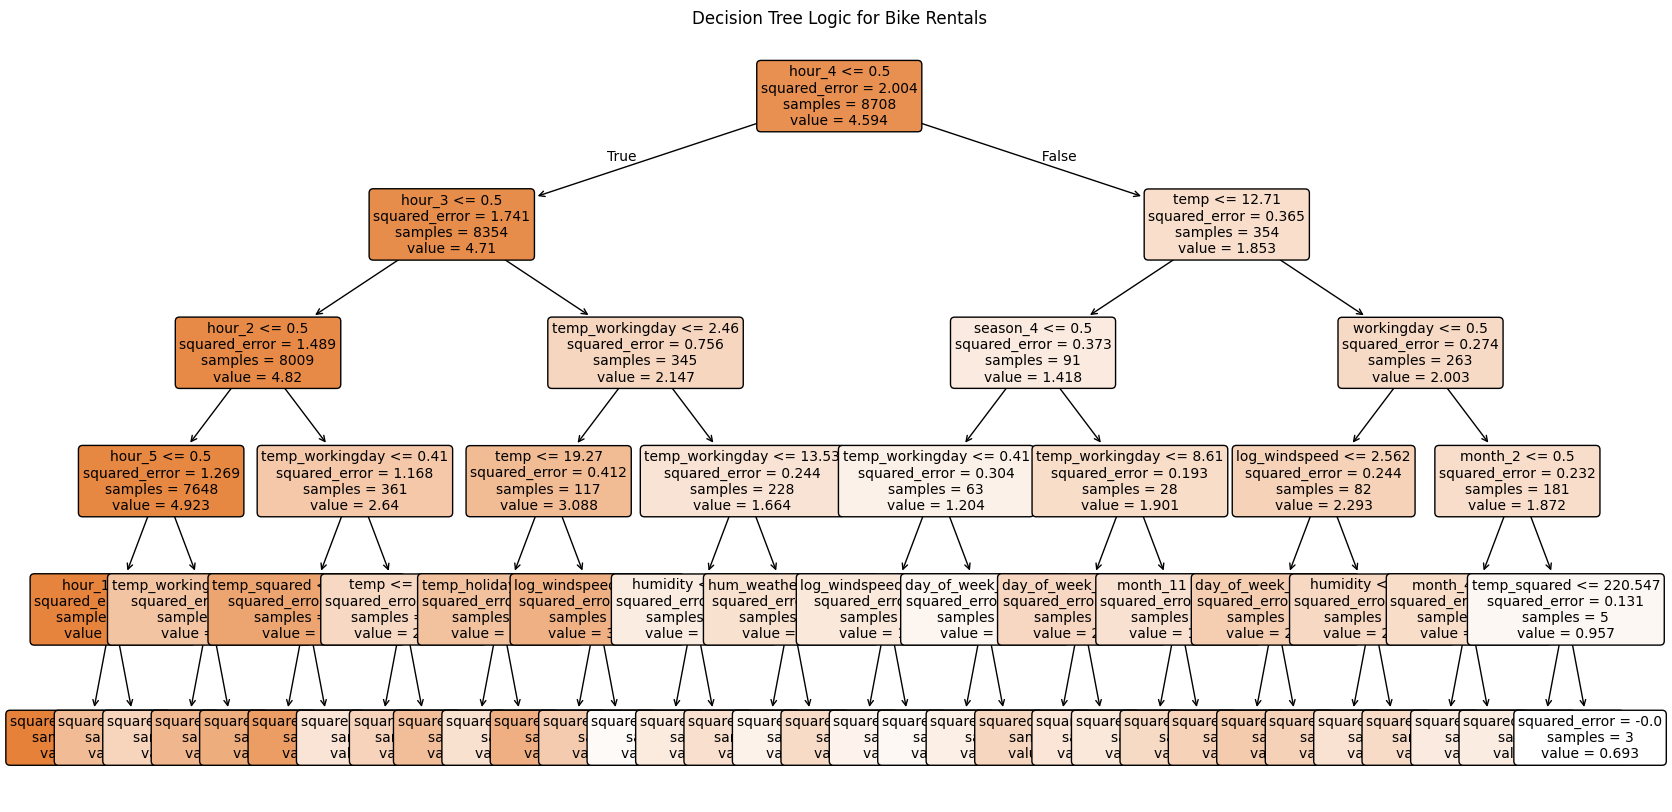

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# 1. Initialize the tree
# We set max_depth to keep it readable and prevent over-memorizing (overfitting)
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# 2. Fit the model using the Log-Target (since it worked best for you)
dt_model.fit(X_train, np.log1p(y_train))

# 3. Visualize the logic
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Logic for Bike Rentals")
plt.show()

In [ ]:
# 1. Predict (these will be in log scale)
dt_log_predictions = dt_model.predict(X_test)

# 2. Convert back to original scale (Real Bikes)
dt_final_predictions = np.expm1(dt_log_predictions)

# 3. Ensure no negative predictions (Decision Trees usually don't,
# but it's good practice for the RMSLE function)
dt_final_predictions = np.maximum(dt_final_predictions, 0)

mae_score, rmsle_score = evaluate_model(y_test, dt_final_predictions, is_log_transformed=False)

print(f"Mean Absolute Error: {mae_score:.2f} bikes")
print(f"RMSLE: {rmsle_score:.4f}")

Mean Absolute Error: 110.56 bikes
RMSLE: 0.9047


## Decision Tree (Random Forests)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Initialize the Forest
# n_estimators is the number of trees in your council
rf_model = RandomForestRegressor(n_estimators=100,
                                 max_depth=10,
                                 random_state=42,
                                 n_jobs=-1) # Uses all your CPU cores for speed

# 2. Fit the model
rf_model.fit(X_train, np.log1p(y_train))

# 3. Predict and Inverse the Log
rf_predictions = rf_model.predict(X_test)

mae_score, rmsle_score = evaluate_model(y_test, rf_predictions, is_log_transformed=True)

print(f"Mean Absolute Error: {mae_score:.2f} bikes")
print(f"RMSLE: {rmsle_score:.4f}")

Mean Absolute Error: 78.30 bikes
RMSLE: 0.6396


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 1. Define the "Search Space"
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] # 'None' uses all features
}

# 2. Initialize the Search
rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,     # How many random combinations to try
    cv=3,          # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,     # Use all CPU cores
    scoring='neg_mean_absolute_error'
)

# 3. Run the search (Remember to use the Log of your target)
rf_random.fit(X_train, np.log1p(y_train))

rf_predictions = rf_random.predict(X_test)

mae_score, rmsle_score = evaluate_model(y_test, rf_predictions, is_log_transformed=True)

print(f"Mean Absolute Error: {mae_score:.2f} bikes")
print(f"RMSLE: {rmsle_score:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mean Absolute Error: 50.88 bikes
RMSLE: 0.4684


In [ ]:
# 1. Print the best parameters found
print("--- Winning Hyperparameters ---")
for param, value in rf_random.best_params_.items():
    print(f"{param:.<20} {value}")

# 2. Check the Feature Importance of the BEST model
best_rf = rf_random.best_estimator_
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Sort them for a cleaner view
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Top 5 Features Driving Your Results ---")
print(feature_importance_df.head(5).to_string(index=False))

--- Winning Hyperparameters ---
n_estimators........ 200
min_samples_split... 5
min_samples_leaf.... 2
max_features........ None
max_depth........... None

--- Top 5 Features Driving Your Results ---
Feature  Importance
 hour_4    0.162933
 hour_3    0.138923
 hour_2    0.106994
 hour_5    0.102746
 hour_1    0.084819


## Gradient Boosted Decision Tree (GBDT)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
import numpy as np

# 1. Initialize the XGBoost Regressor
# We use 'reg:squarederror' for regression tasks
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,   # Number of trees to build
    learning_rate=0.05,  # How much each tree "fixes" the previous error
    max_depth=6,         # How "tall" the trees can grow
    subsample=0.8,       # Use 80% of data for each tree to prevent overfitting
    random_state=42
)

# 2. Fit the model
# Note: XGBoost handles raw counts well, but since you liked the
# Log-Gaussian results, training on the Log-Target is often even better!
y_train_log = np.log1p(y_train)
xgb_model.fit(X_train, y_train_log)

# 3. Predict and Inverse Transform
log_preds = xgb_model.predict(X_test)
final_preds = np.expm1(log_preds)
final_preds = np.maximum(final_preds, 0) # Ensure no negative bikes

# 4. Evaluate
mae = mean_absolute_error(y_test, final_preds)
rmsle = np.sqrt(mean_squared_log_error(y_test, final_preds))

print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost RMSLE: {rmsle:.4f}")

XGBoost MAE: 46.28
XGBoost RMSLE: 0.4161


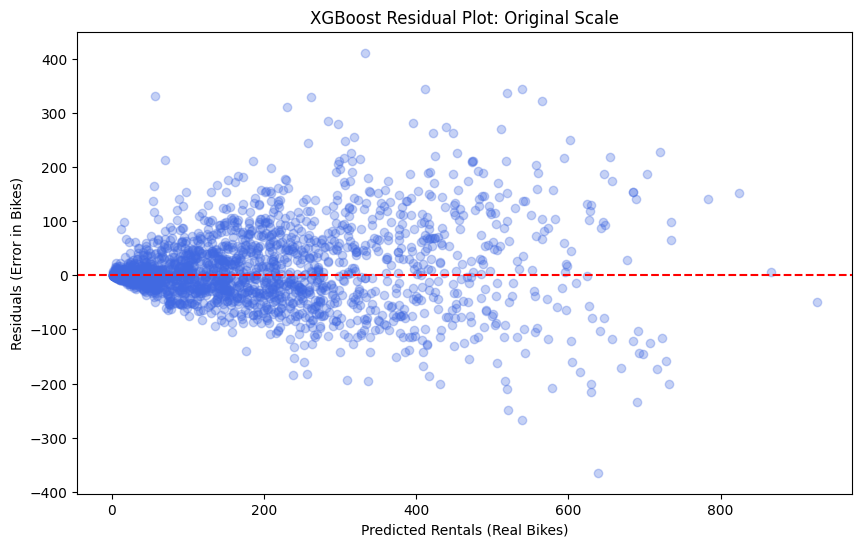

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Get predictions from XGBoost (Currently in Log Space)
log_predictions_xgb = xgb_model.predict(X_test)

# 2. Transform predictions back to Real Bikes (Inverse Log)
# We use expm1 because the model was trained on log1p(y)
final_predictions_xgb = np.expm1(log_predictions_xgb)

# 3. Calculate residuals on the Original Scale (Real Bikes)
# Actual Bikes - Predicted Bikes
residuals_xgb = np.asarray(y_test).flatten() - final_predictions_xgb

# 4. Plot
plt.figure(figsize=(10, 6))
plt.scatter(final_predictions_xgb, residuals_xgb, alpha=0.3, color='royalblue')
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Predicted Rentals (Real Bikes)')
plt.ylabel('Residuals (Error in Bikes)')
plt.title('XGBoost Residual Plot: Original Scale')
plt.show()

### Stacked Generalization

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV # A simple, stable linear model

# 1. Define your "Base Experts"
# Use the tuned parameters you found earlier
base_models = [
    ('rf', best_rf), # Your tuned Random Forest
    ('xgb', xgb_model) # Your tuned XGBoost
]

# 2. Initialize the Stacker
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=RidgeCV(), # The Meta-Learner
    cv=5, # Internal validation to prevent overfitting
    n_jobs=-1
)

# 3. Fit (Again, use the Log-Target!)
stack_model.fit(X_train, np.log1p(y_train))

# 4. Predict
log_preds = stack_model.predict(X_test)
final_preds = np.expm1(log_preds)

In [ ]:
mae_score, rmsle_score = evaluate_model(y_test, final_preds, is_log_transformed=False)

print(f"Mean Absolute Error: {mae_score:.2f} bikes")
print(f"RMSLE: {rmsle_score:.4f}")

Mean Absolute Error: 45.97 bikes
RMSLE: 0.4150
y_test sample: [127  13 163]
preds sample:  [150.22611058   5.77076324 145.61064946]
Any negatives? False
